# Polynomial Regression - Lab

## Introduction

In this lab, you'll practice your knowledge on adding polynomial terms to your regression model! 

## Objectives

You will be able to:

- Use sklearn's built in capabilities to create polynomial features 

## Dataset

Here is the dataset you will be working with in this lab: 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('sample_data.csv')

df.head()

,x,y
0,0.000000,0.942870
1,0.121212,-2.261629
2,0.242424,3.100749
3,0.363636,-0.285446
4,0.484848,-1.012210


Run the following line of code. You will notice that the data is clearly of non-linear shape. Begin to think about what degree polynomial you believe will fit it best.

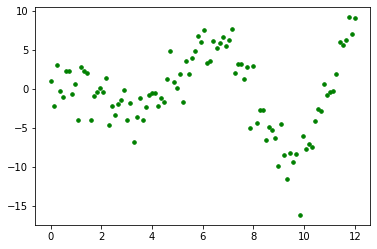

In [7]:
plt.scatter(df['x'], df['y'], color='green', s=50, marker='.');

## Train-test split

The next step is to split the data into training and test sets. Set the `random_state` to 42 and assign 75% of the data in the training set. 

In [8]:
# Split data into 75-25 train-test split 
from sklearn.model_selection import train_test_split
y = df['y']
X = df.drop(columns='y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.75)

## Build polynomial models

Now it's time to determine the optimal degree of polynomial features for a model that is fit to this data. For each of second, third and fourth degrees: 

- Instantiate `PolynomialFeatures()` with the number of degrees 
- Fit and transform the `X_train` features 
- Instantiate and fit a linear regression model on the training data 
- Transform the test data into polynomial features 
- Use the model you built above to make predictions using the transformed test data 
- Evaluate model performance on the test data using `r2_score()` 
- In order to plot how well the model performs on the full dataset, transform `X` using `poly` 
- Use the same model (`reg_poly`) to make predictions using `X_poly` 


degree 2 -0.14450360246115057
degree 3 0.019316598557331033
degree 4 0.5138362771625364
degree 5 0.6512704798094575
degree 6 0.7818511811317748
degree 7 0.8685992975734955


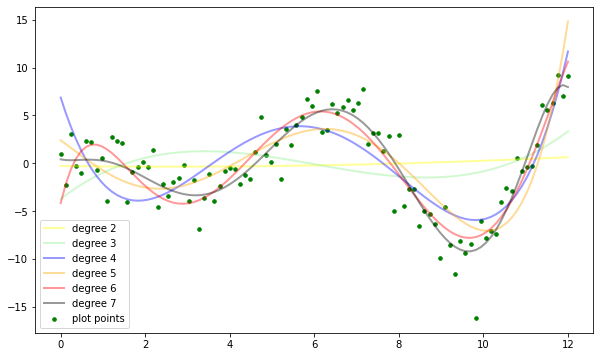

In [21]:
# Import relevant modules and functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

colors = ['yellow', 'lightgreen', 'blue', 'orange', 'red', 'black']
plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], color='green', s=50, marker='.', label='plot points')

# We'll fit 3 different polynomial regression models from degree 2 to degree 4
for index, degree in enumerate([2, 3, 4, 5, 6, 7]):
    
    # Instantiate PolynomialFeatures
    poly = PolynomialFeatures(degree)
    
    # Fit and transform X_train
    X_poly_train = poly.fit_transform(X_train)
    
    # Instantiate and fit a linear regression model to the polynomial transformed train features
    reg_poly = LinearRegression().fit(X_poly_train, y_train)
    
    # Transform the test data into polynomial features
    X_poly_test = poly.fit_transform(X_test)
    
    # Get predicted values for transformed polynomial test data  
    y_pred = reg_poly.predict(X_poly_test)
    
    # Evaluate model performance on test data
    print("degree %d" % degree, r2_score(y_test, y_pred))
    
    # Transform the full data
    X_poly = poly.fit_transform(X)
    
    # Now, we want to see what the model predicts for the entire data 
    y_poly = reg_poly.predict(X_poly)
    
    # Create plot of predicted values
    plt.plot(X, y_poly, color = colors[index], linewidth=2, label='degree %d' % degree, alpha=.4)
    plt.legend(loc='lower left')

## Summary

Great job! You now know how to include polynomials in your linear models. 